Results:
  Gaussian Noise (Mean = 2, Std = [0, 50]) : 0.0, Accuracy: 0.8933500627352572
  Gaussian Noise (Mean = 2, Std = [0, 50]) : 10.0, Accuracy: 0.8130489335006273
  Gaussian Noise (Mean = 2, Std = [0, 50]) : 20.0, Accuracy: 0.726474278544542
  Gaussian Noise (Mean = 2, Std = [0, 50]) : 30.0, Accuracy: 0.6762860727728983
  Gaussian Noise (Mean = 2, Std = [0, 50]) : 40.0, Accuracy: 0.5846925972396487
  Gaussian Noise (Mean = 2, Std = [0, 50]) : 50.0, Accuracy: 0.5470514429109159


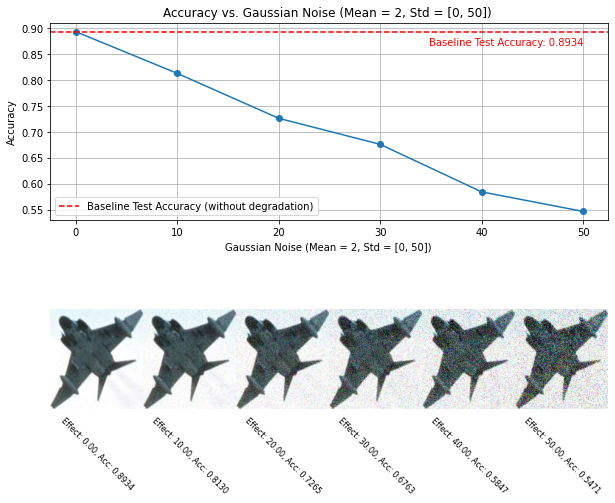

In [9]:
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

# Load the JSON data
with open("../outputs/inference_results.json", "r") as f:
    data = json.load(f)

# Load the test accuracy calculated post-training
with open("../outputs/test_accuracy.txt", "r") as f:
    test_accuracy = float(f.read())

parameter_name = data["parameter_name"]
results = data["results"]

# Extract parameters, accuracies, and image filenames
parameters = [result["parameter"] for result in results]
accuracies = [result["accuracy"] for result in results]
image_filenames = [result["image_name"] for result in results]

# Create the plot
plt.figure(figsize=(10, 8), facecolor='w')  # Adjust figure size for plot and images
plt.subplot(2, 1, 1)  # Create subplot for the plot
plt.plot(parameters, accuracies, marker='o')
plt.axhline(test_accuracy, color='r', linestyle='--', label='Baseline Test Accuracy (without degradation)')
plt.text(parameters[-1], test_accuracy - 0.03, f"Baseline Test Accuracy: {test_accuracy:.4f}", ha='right', va='bottom', color='r')
plt.legend()
plt.xlabel(parameter_name)
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. {parameter_name}")
plt.grid(True)

# Display images horizontally
image_arrays = []
for filename in image_filenames:
    try:
        img = mpimg.imread(os.path.join('..', filename))
        image_arrays.append(img)
    except FileNotFoundError:
        print(f"Image not found: {filename}")
        image_arrays.append(np.zeros((100, 100, 3), dtype=np.uint8) + 255) # White placeholder

if image_arrays:
    combined_image = np.hstack(image_arrays)
    plt.subplot(2, 1, 2)  # Create subplot for combined image
    plt.imshow(combined_image)
    plt.axis('off')

    # Add titles below each image
    image_width = image_arrays[0].shape[1]
    for i, param in enumerate(parameters):
        # plt.text(i * image_width + image_width / 2, combined_image.shape[0] + 10,
        #          f"{parameter_name}: {param:.2f}, Acc: {accuracies[i]:.4f}",
        #          ha='center', va='top', fontsize=8, rotation = -45)
        plt.text(i * image_width + image_width / 2, combined_image.shape[0] + 10,
                 f"Effect: {param:.2f}, Acc: {accuracies[i]:.4f}",
                 ha='center', va='top', fontsize=8, rotation = -45)

# plt.tight_layout()
# plt.show()

# Optionally, print the results
print("Results:")
parameter_lower_bound = None
for result in results:
    if parameter_lower_bound is None:
        parameter_lower_bound = result['parameter']
    print(f"  {parameter_name}: {result['parameter']}, Accuracy: {result['accuracy']}")

parameter_upper_bound = result['parameter']

# Optionally, save the plot
plt.savefig(f"../outputs/{parameter_name.lower().replace(' ', '_')}_{parameter_lower_bound}_{parameter_upper_bound}_{len(results)}_{test_accuracy:.4f}.png")
plt.show()